In [44]:
import helpers
import numpy as np

#helpers.npNicePrint(arr)

data = """47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47"""
with open("input_5.txt", 'r') as f:
    data = f.read()
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [x.split(' ') for x in data.split('\n') if x]
#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]
#grid = {(x,y): val for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid

rules, instructions = data.split("\n\n")
rules = rules.split("\n")
rules = [(list(map(int,r.split("|")))) for r in rules]
instructions = instructions.split("\n")
instructions= [(list(map(int,r.split(",")))) for r in instructions]

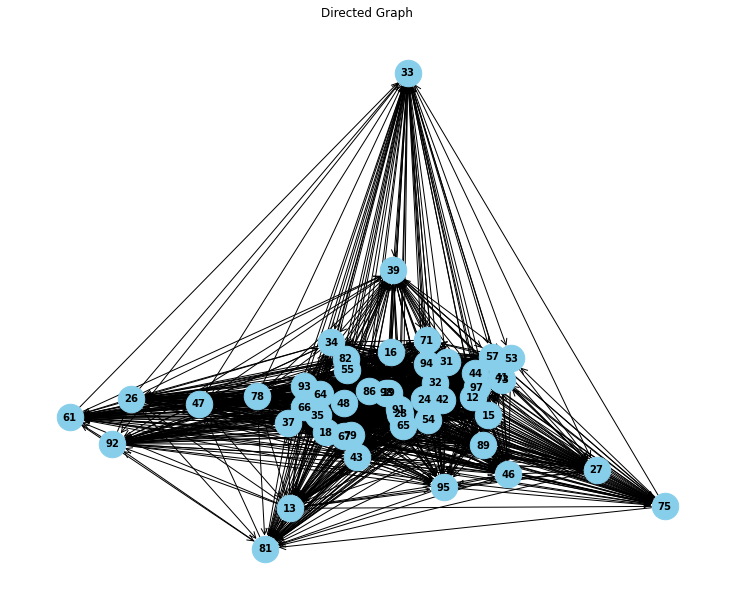

In [45]:
import networkx as nx
import matplotlib.pyplot as plt


    
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(rules)

# Draw the directed graph
plt.figure(figsize=(10, 8))
pos = nx.spectral_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", arrowstyle="->", arrowsize=15)
plt.title("Directed Graph")
plt.show()

In [46]:
ans = 0
for instruction in instructions:
    for i in range(len(instruction)):
        past = set(instruction[:i])  # All elements before the current one
        current = instruction[i]  
        if not past == (past & set(G.predecessors(current))):
            #print(f"failed {instruction}")
            break
        if i == len(instruction)-1:
            ans += instruction[len(instruction)//2] # should be uneven
ans

6612

In [28]:
instruction

[97, 13, 75, 29, 47]